In [1]:
from utils.analysis_helpers import * 
from utils.plot_helpers import *
import pandas as pd

### training and test performance

In [2]:
N_collection = [20, 40]
V_factors = [1, 2, 4, 8]

performance = {'N': [], '|V|': [], 'factor': [], 
               'train_acc': [], 'test_acc': [], 
               'train_mae': [], 'test_mae': [],
               'random_mae': []}

for N in N_collection:
    
    min_V = 2*N + 1
    
    for factor in V_factors: 
        
        V = min_V * factor
        
        interaction_train = load_interaction(N, V, mode='train')
        interaction_test = load_interaction(N, V, mode='test')
        
        acc_train, mae_train = calc_performance(interaction_train)
        acc_test, mae_test = calc_performance(interaction_test)
        if factor == 1:
            random_mae = calc_random_mae(interaction_train)
        
        performance['N'].append(N)
        performance['|V|'].append(V)
        performance['factor'].append(factor)
        performance['train_acc'].append(acc_train.item())
        performance['train_mae'].append(mae_train.item())
        performance['test_acc'].append(acc_test.item())
        performance['test_mae'].append(mae_test.item())
        performance['random_mae'].append(random_mae.item())
        
performance = pd.DataFrame(performance)

In [3]:
performance

,N,|V|,factor,train_acc,test_acc,train_mae,test_mae,random_mae
0,20,41,1,0.971839,0.159091,0.067960,1.568182,11.848318
1,20,82,2,0.981763,0.113636,0.076071,2.090909,11.848318
2,20,164,4,0.996121,0.068182,0.019748,1.750000,11.848318
3,20,328,8,0.993451,0.113636,0.018791,1.181818,11.848318
4,40,81,1,0.939894,0.089286,0.410562,3.458333,23.443867
5,40,162,2,0.947878,0.190476,0.201798,2.851191,23.443867
6,40,324,4,0.992056,0.154762,0.023529,2.857143,23.443867
7,40,648,8,0.995268,0.178571,0.015625,2.083333,23.443867


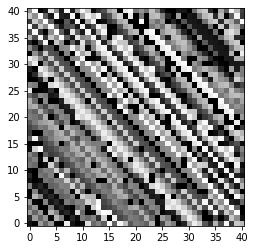

In [226]:
plot_symbol_per_input(logs)

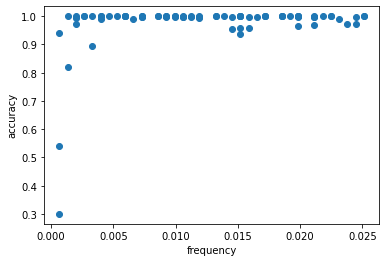

In [180]:
R = plot_accuracy_versus_frequency(logs)

In [181]:
information_scores(test_logs, N)

{'NMI_sums': 0.9009494067332878,
 'NMI_numbers': 0.7004069948772167,
 'polysemy_sums': 0.11346390508173065,
 'polysemy_numbers': 0.44923266956310115,
 'synonymy_sums': 0.08416087248382394,
 'synonymy_numbers': 0.03830794161392154}

In [182]:
calc_performance(logs)

(tensor(0.9921), tensor(0.0235), (tensor(-0.0114), tensor(0.0036)))